In [15]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import parselmouth

In [32]:
# Path to your audio file
audio_path = "C:/Users/jbkee/OneDrive/Desktop/Jupyter Projects/RAVDESS/Actor_01/03-01-01-01-01-01-01.wav"  # change to your actual path

In [33]:
from pathlib import Path
data_folder = Path("C:/Users/jbkee/OneDrive/Desktop/Jupyter Projects/RAVDESS/Actor_01")  # adjust to your folder
wav_files = list(data_folder.glob("*.wav"))

for f in wav_files[:5]:
    print(f.name)

03-01-01-01-01-01-01.wav
03-01-01-01-01-02-01.wav
03-01-01-01-02-01-01.wav
03-01-01-01-02-02-01.wav
03-01-02-01-01-01-01.wav


In [34]:
# --- Load and preprocess audio ---
y, sr = librosa.load(audio_path, sr=16000)
y, _ = librosa.effects.trim(y, top_db=20)
y = y / np.max(np.abs(y))  # normalize

In [35]:
# --- Extract MFCCs ---
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
mfcc_mean = np.mean(mfcc, axis=1)
mfcc_std = np.std(mfcc, axis=1)

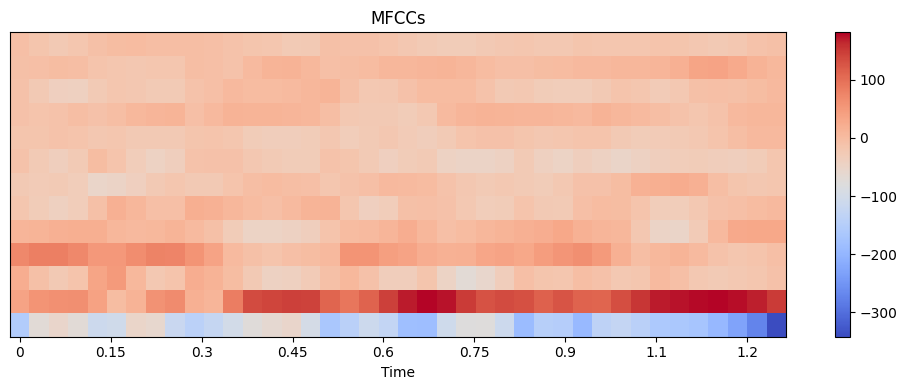

In [36]:
# --- Plot MFCCs ---
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc, x_axis='time', sr=sr)
plt.colorbar()
plt.title("MFCCs")
plt.tight_layout()
plt.show()

In [37]:
# --- Extract pitch using librosa.yin ---
pitch = librosa.yin(y, fmin=50, fmax=500, sr=sr)
pitch_mean = np.mean(pitch)
pitch_std = np.std(pitch)

In [38]:
# --- Extract formants using Parselmouth ---
snd = parselmouth.Sound(audio_path)
formant = snd.to_formant_burg()
times = np.arange(0, snd.duration, 0.01)
f1 = [formant.get_value_at_time(1, t) for t in times]
f2 = [formant.get_value_at_time(2, t) for t in times]
f3 = [formant.get_value_at_time(3, t) for t in times]

In [39]:
# Filter out None or zero values
f1 = [f for f in f1 if f and f > 0]
f2 = [f for f in f2 if f and f > 0]
f3 = [f for f in f3 if f and f > 0]

In [40]:
f1_mean = np.mean(f1) if f1 else 0
f2_mean = np.mean(f2) if f2 else 0
f3_mean = np.mean(f3) if f3 else 0

In [41]:
# --- Print to verify ---
print("MFCC mean (first 5):", mfcc_mean[:5])
print("Pitch mean:", pitch_mean)
print("Formants (F1, F2, F3):", f1_mean, f2_mean, f3_mean)

MFCC mean (first 5): [-134.42795     114.354576    -13.819464     31.798847      0.47914848]
Pitch mean: 134.8279708959836
Formants (F1, F2, F3): 907.2303786171005 1983.1560894437016 2988.539993791937


In [42]:
# --- Save features to CSV ---
features = {
    "filename": audio_path.split("/")[-1],
    "mfcc1_mean": mfcc_mean[0],
    "mfcc2_mean": mfcc_mean[1],
    "mfcc3_mean": mfcc_mean[2],
    "pitch_mean": pitch_mean,
    "pitch_std": pitch_std,
    "f1_mean": f1_mean,
    "f2_mean": f2_mean,
    "f3_mean": f3_mean
}

In [43]:
df = pd.DataFrame([features])
df.to_csv("sample_features.csv", index=False)
print("Saved to sample_features.csv")

Saved to sample_features.csv
